In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 2.0) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 113
Open profit: -20.85
Close profit: -20.36
Open ROI: -0.1845132743362832
Close ROI: -0.18017699115044247
UDI: 0.0062648798492310285
AxesSubplot(0.125,0.125;0.775x0.755)


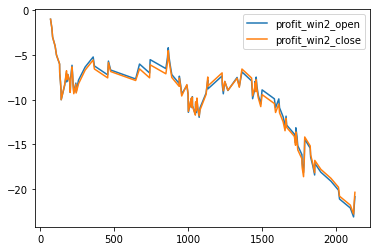

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
simple_expected_difference_loc,-0.118476
simple_expected_difference,-0.082725
expected_total_loc,-0.076843
expected_difference,-0.075120
simple_expected_total_value,0.038926
simple_expected_total_value_loc,-0.015535
expected_difference_loc,-0.002088
expected_total,-0.001477


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
simple_expected_total_value_loc,5.046071,4.914762,0.131310
simple_expected_total_value,5.098929,4.982381,0.116548
expected_difference,-0.405729,-0.509910,0.104181
expected_total_loc,2.362186,2.281048,0.081138
expected_total,2.364911,2.291548,0.073363
simple_expected_difference,-0.367857,-0.421905,0.054048
simple_expected_difference_loc,-0.078393,-0.123810,0.045417
expected_difference_loc,-0.430807,-0.467781,0.036974


In [6]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.46) & (segmented_df['expected_difference'] <= -0.49)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference_loc,-0.984950,-0.808027,0.176923
expected_difference,-0.873556,-0.742082,0.131474


Count: 9
Open profit: -3.08
Close profit: -3.12
Open ROI: -0.3422222222222222
Close ROI: -0.3466666666666667
UDI: -0.009961870584115906
AxesSubplot(0.125,0.125;0.775x0.755)


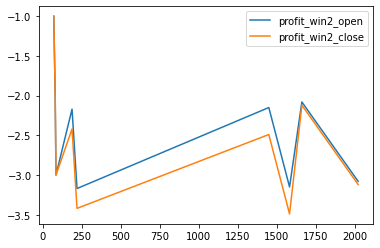

In [7]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference'] <= -0.83) & (segmented_df['expected_difference_loc'] <= -0.99)
]
utils.print_away_win_result(filtered_result_df)